[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [1]:
#Libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import datetime
 
from scipy.stats import pearsonr

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))


In [3]:
def cor_dist_dur(df_names):
    res_df=pd.DataFrame()
    for i,df_name in enumerate (df_names):
            # load the ith dataframe, taking only the t_pickup_datetime column
            df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'], 
                             parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=100000)
            df['trip_duration']=round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm'),2)
            
            res_df=res_df.append(df.loc[:,['trip_duration','trip_distance']])
    return res_df

In [4]:
res_df=cor_dist_dur(df_names)

# The dependence between distance and duration of the trip

In [28]:
sample_for_plot=res_df.sample(200000)

In [29]:
sample_for_plot.shape

(200000, 2)

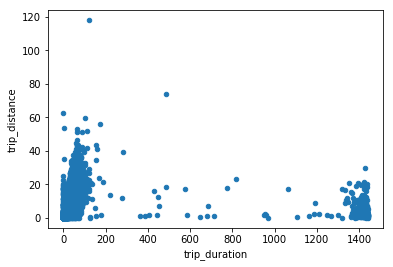

In [30]:
sample_for_plot.plot(x='trip_duration', y='trip_distance', kind='scatter')

# Pearson Coefficient

In [31]:
%%latex
\[H_0\text {={"Distance and duration of the trip are NOT correlated"}}\]
\[H_1\text {={"Distance and duration of the trip are correlated"}}\]

<IPython.core.display.Latex object>

In [32]:
res_df.corr(method='pearson') #pearson is default

,trip_duration,trip_distance
trip_duration,1.000000,0.149811
trip_distance,0.149811,1.000000


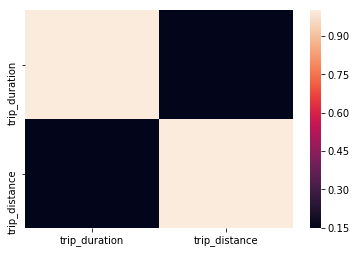

In [33]:
sns.heatmap(res_df.corr(method='pearson'))#, cmap='hot'

### Is it significant?

## Whole dataset

In [39]:
pearson,p_value=pearsonr(res_df.trip_duration,res_df.trip_distance)

In [40]:
print('Pearson:'+str(round(pearson,4))+'\n'+"p value:"+str(p_value))

Pearson:0.1498
p value:0.0


p value:0.0 ---> Thus, there is dependancy between distance and duration of the trip.

## Sample

In [41]:
pearson,p_value=pearsonr(sample_for_plot.trip_duration,sample_for_plot.trip_distance)

In [42]:
print('Pearson:'+str(round(pearson,4))+'\n'+"p value:"+str(p_value))

Pearson:0.1486
p value:0.0


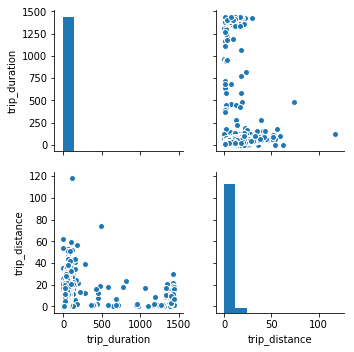

In [43]:
sns.pairplot(sample_for_plot)